## Imports

In [7]:
import matplotlib.pyplot as plt  
from time import time
from datetime import datetime
from matplotlib import pyplot
import random
from tqdm import tqdm

import pandas as pd  #
import time
import csv
import numpy as np
import pylab

# Given you have done all the above properly, this should run perfectly
import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing

Using TensorFlow backend.


## Input Data

In [2]:
df_in = pd.read_csv(r'eskin_input.csv',header=None)
df_in = pd.DataFrame(df_in)
df_in.head()

,0,1,2,3,4,5,6,7,8,9,...,800,801,802,803,804,805,806,807,808,809
0,47.0,33.0,52.0,69.0,37.0,50.0,33.0,31.0,48.0,78.0,...,45.0,58.0,48.0,34.0,60.0,55.0,60.0,62.0,33.0,42.0
1,73.0,52.0,41.0,74.0,36.0,39.0,58.0,39.0,51.0,60.0,...,45.0,57.0,36.0,51.0,40.0,32.0,44.0,59.0,46.0,47.0
2,37.0,30.0,35.0,37.0,47.0,55.0,57.0,47.0,38.0,69.0,...,49.0,42.0,52.0,35.0,71.0,36.0,53.0,35.0,44.0,60.0
3,60.0,54.0,39.0,39.0,32.0,43.0,48.0,38.0,50.0,48.0,...,43.0,47.0,46.0,47.0,40.0,37.0,63.0,34.0,48.0,49.0
4,35.0,33.0,43.0,32.0,35.0,92.0,40.0,41.0,37.0,47.0,...,49.0,33.0,48.0,46.0,38.0,39.0,40.0,45.0,46.0,35.0


In [3]:
df_out = pd.read_csv(r'eskin_output.csv',header=None)
df_out = pd.DataFrame(df_out)
df_out.head()

,0
0,rub
1,rub
2,rub
3,stroke
4,poke


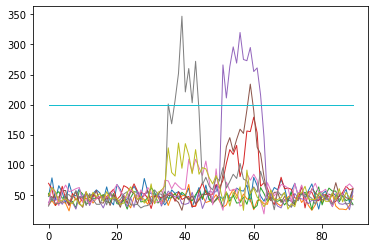

0    rub
Name: 0, dtype: object


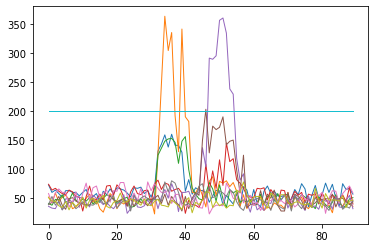

0    rub
Name: 1, dtype: object


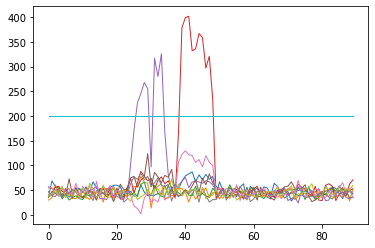

0    rub
Name: 2, dtype: object


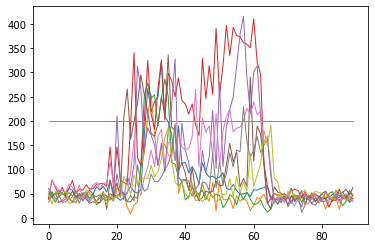

0    stroke
Name: 3, dtype: object


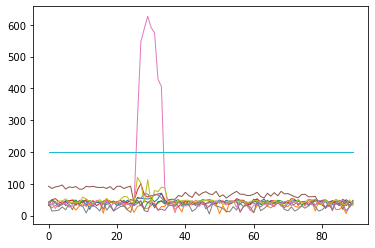

0    poke
Name: 4, dtype: object


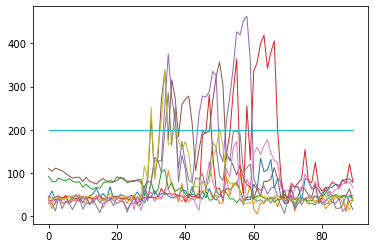

0    stroke
Name: 5, dtype: object


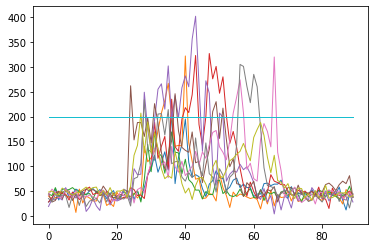

0    stroke
Name: 6, dtype: object


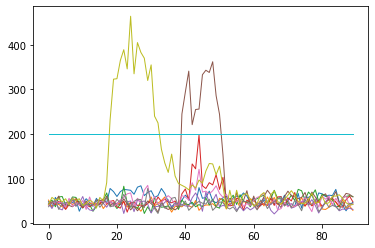

0    rub
Name: 7, dtype: object


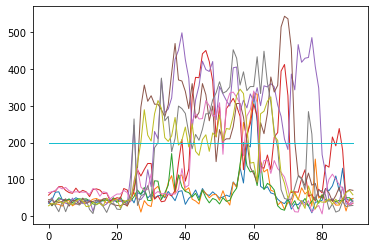

0    stroke
Name: 8, dtype: object


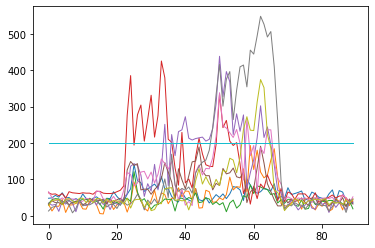

0    stroke
Name: 9, dtype: object


In [6]:
for i in range(10):
    index = i

    act_test = df_in.iloc[index,:]
    act_label = df_out.iloc[index,:]
    testline = list(act_test)

    Fs0 = testline[0::9]
    Fs1 = testline[1::9]
    Fs2 = testline[2::9]
    Fs3 = testline[3::9]
    Fs4 = testline[4::9]
    Fs5 = testline[5::9]
    Fs6 = testline[6::9]
    Fs7 = testline[7::9]
    Fs8 = testline[8::9]

    ls = list(range(90))
    two = np.ones(len(ls))*200

    plt.plot(ls,Fs0,linewidth=1.0)
    plt.plot(ls,Fs1,linewidth=1.0)
    plt.plot(ls,Fs2,linewidth=1.0)
    plt.plot(ls,Fs3,linewidth=1.0)
    plt.plot(ls,Fs4,linewidth=1.0)
    plt.plot(ls,Fs5,linewidth=1.0)
    plt.plot(ls,Fs6,linewidth=1.0)
    plt.plot(ls,Fs7,linewidth=1.0)
    plt.plot(ls,Fs8,linewidth=1.0)
    plt.plot(ls,two,linewidth=1.0)
    plt.show()
    
    print(act_label)

## Statistics Funcitons

In [19]:
df_stats = []
data_len = 90

for index, row in tqdm(df_in.iterrows()):
    #print(row)
    
    # mean
    m1 = row[0::9].mean()
    m2 = row[1::9].mean()
    m3 = row[2::9].mean()
    m4 = row[3::9].mean()
    m5 = row[4::9].mean()
    m6 = row[5::9].mean()
    m7 = row[6::9].mean()
    m8 = row[7::9].mean()
    m9 = row[8::9].mean()
    mt = row.mean()
    
    # std
    st1 = row[0::9].std()
    st2 = row[1::9].std()
    st3 = row[2::9].std()
    st4 = row[3::9].std()
    st5 = row[4::9].std()
    st6 = row[5::9].std()
    st7 = row[6::9].std()
    st8 = row[7::9].std()
    st9 = row[8::9].std()
    std = row.std()
    
    # var
    va1 = row[0::9].var()
    va2 = row[1::9].var()
    va3 = row[2::9].var()
    va4 = row[3::9].var()
    va5 = row[4::9].var()
    va6 = row[5::9].var()
    va7 = row[6::9].var()
    va8 = row[7::9].var()
    va9 = row[8::9].var()
    var = row.var()
    
    # mad
    ma1 = row[0::9].mad()
    ma2 = row[1::9].mad()
    ma3 = row[2::9].mad()
    ma4 = row[3::9].mad()
    ma5 = row[4::9].mad()
    ma6 = row[5::9].mad()
    ma7 = row[6::9].mad()
    ma8 = row[7::9].mad()
    ma9 = row[8::9].mad()
    mad = row.mad()
    
    # max
    max1 = row[0::9].max()
    max2 = row[1::9].max()
    max3 = row[2::9].max()
    max4 = row[3::9].max()
    max5 = row[4::9].max()
    max6 = row[5::9].max()
    max7 = row[6::9].max()
    max8 = row[7::9].max()
    max9 = row[8::9].max()
    maxt = row.max()
    
    # min
    min1 = row[0::9].min()
    min2 = row[1::9].min()
    min3 = row[2::9].min()
    min4 = row[3::9].min()
    min5 = row[4::9].min()
    min6 = row[5::9].min()
    min7 = row[6::9].min()
    min8 = row[7::9].min()
    min9 = row[8::9].min()
    mint = row.min()
    
    # range
    ran1 = max1 - min1
    ran2 = max2 - min2
    ran3 = max3 - min3
    ran4 = max4 - min4
    ran5 = max5 - min5
    ran6 = max6 - min6
    ran7 = max7 - min7
    ran8 = max8 - min8
    ran9 = max9 - min9
    rant = maxt - mint
    
    # sma
    sma = sum(row)/data_len
    
    # energy 
    e1 = (row[0::9]**2).sum()/data_len
    e2 = (row[1::9]**2).sum()/data_len
    e3 = (row[2::9]**2).sum()/data_len
    e4 = (row[3::9]**2).sum()/data_len
    e5 = (row[4::9]**2).sum()/data_len
    e6 = (row[5::9]**2).sum()/data_len
    e7 = (row[6::9]**2).sum()/data_len
    e8 = (row[7::9]**2).sum()/data_len
    e9 = (row[8::9]**2).sum()/data_len
    et = (row**2).sum()/(data_len*9)
    
    # iqr
    iq1 = np.subtract(*np.percentile(row[0::9], [75, 25]))
    iq2 = np.subtract(*np.percentile(row[1::9], [75, 25]))
    iq3 = np.subtract(*np.percentile(row[2::9], [75, 25]))
    iq4 = np.subtract(*np.percentile(row[3::9], [75, 25]))
    iq5 = np.subtract(*np.percentile(row[4::9], [75, 25]))
    iq6 = np.subtract(*np.percentile(row[5::9], [75, 25]))
    iq7 = np.subtract(*np.percentile(row[6::9], [75, 25]))
    iq8 = np.subtract(*np.percentile(row[7::9], [75, 25]))
    iq9 = np.subtract(*np.percentile(row[8::9], [75, 25]))
    iqrt = np.subtract(*np.percentile(row, [75, 25]))
    
    # appending
    df_stats.append([m1,m2,m3,m4,m5,m6,m7,m8,m9,mt,st1,st2,st3,st4,st5,st6,st7,st8,st9,std,
                    va1,va2,va3,va4,va5,va6,va7,va8,va9,var,ma1,ma2,ma3,ma4,ma5,ma6,ma7,ma8,ma9,mad,
                    max1,max2,max3,max4,max5,max6,max7,max8,max9,maxt,
                    min1,min2,min3,min4,min5,min6,min7,min8,min9,mint,
                    ran1,ran2,ran3,ran4,ran5,ran6,ran7,ran8,ran9,rant,
                    sma,e1,e2,e3,e4,e5,e6,e7,e8,e9,et,
                    iq1,iq2,iq3,iq4,iq5,iq6,iq7,iq8,iq9,iqrt])

5760it [01:15, 76.16it/s]


In [20]:
df_stats = pd.DataFrame(df_stats)
df_stats.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,52.177778,41.044444,44.522222,59.300000,73.244444,60.322222,56.977778,69.855556,55.388889,56.981481,...,15.00,12.75,14.00,17.75,17.50,13.75,21.50,29.00,21.50,17.00
1,65.988889,68.444444,58.200000,61.166667,70.088889,59.588889,51.922222,45.711111,44.688889,58.422222,...,13.00,20.75,14.00,18.00,20.75,16.00,19.75,12.00,11.00,19.00
2,52.088889,43.633333,44.533333,83.066667,67.933333,52.477778,52.411111,45.533333,44.933333,54.067901,...,14.75,15.50,12.75,22.50,20.75,15.00,16.75,12.75,13.00,15.75
3,76.633333,55.400000,63.288889,154.366667,107.688889,92.022222,102.311111,68.300000,64.022222,87.114815,...,33.25,16.00,14.75,204.50,114.00,71.75,110.00,47.25,30.75,63.50
4,41.700000,31.333333,41.577778,44.500000,35.677778,65.966667,79.611111,30.533333,47.644444,46.504938,...,9.75,13.75,8.00,10.75,13.00,32.00,12.00,20.75,8.00,13.00


In [21]:
from scipy.fft import fft, ifft

In [23]:
df_fft = []
data_len = 90

for index, row in tqdm(df_in.iterrows()):
    #print(row)
    
    row = fft(np.array(row))
    row = pd.DataFrame(row)
    
    # mean
    m1 = row[0::9].mean()
    m2 = row[1::9].mean()
    m3 = row[2::9].mean()
    m4 = row[3::9].mean()
    m5 = row[4::9].mean()
    m6 = row[5::9].mean()
    m7 = row[6::9].mean()
    m8 = row[7::9].mean()
    m9 = row[8::9].mean()
    mt = row.mean()
    
    # std
    st1 = row[0::9].std()
    st2 = row[1::9].std()
    st3 = row[2::9].std()
    st4 = row[3::9].std()
    st5 = row[4::9].std()
    st6 = row[5::9].std()
    st7 = row[6::9].std()
    st8 = row[7::9].std()
    st9 = row[8::9].std()
    std = row.std()
    
    # var
    va1 = row[0::9].var()
    va2 = row[1::9].var()
    va3 = row[2::9].var()
    va4 = row[3::9].var()
    va5 = row[4::9].var()
    va6 = row[5::9].var()
    va7 = row[6::9].var()
    va8 = row[7::9].var()
    va9 = row[8::9].var()
    var = row.var()
    
    # mad
    ma1 = row[0::9].mad()
    ma2 = row[1::9].mad()
    ma3 = row[2::9].mad()
    ma4 = row[3::9].mad()
    ma5 = row[4::9].mad()
    ma6 = row[5::9].mad()
    ma7 = row[6::9].mad()
    ma8 = row[7::9].mad()
    ma9 = row[8::9].mad()
    mad = row.mad()
    
    # max
    max1 = row[0::9].max()
    max2 = row[1::9].max()
    max3 = row[2::9].max()
    max4 = row[3::9].max()
    max5 = row[4::9].max()
    max6 = row[5::9].max()
    max7 = row[6::9].max()
    max8 = row[7::9].max()
    max9 = row[8::9].max()
    maxt = row.max()
    
    # min
    min1 = row[0::9].min()
    min2 = row[1::9].min()
    min3 = row[2::9].min()
    min4 = row[3::9].min()
    min5 = row[4::9].min()
    min6 = row[5::9].min()
    min7 = row[6::9].min()
    min8 = row[7::9].min()
    min9 = row[8::9].min()
    mint = row.min()
    
    # range
    ran1 = max1 - min1
    ran2 = max2 - min2
    ran3 = max3 - min3
    ran4 = max4 - min4
    ran5 = max5 - min5
    ran6 = max6 - min6
    ran7 = max7 - min7
    ran8 = max8 - min8
    ran9 = max9 - min9
    rant = maxt - mint
    
    # sma
    sma = sum(row)/data_len
    
    # energy 
    e1 = (row[0::9]**2).sum()/data_len
    e2 = (row[1::9]**2).sum()/data_len
    e3 = (row[2::9]**2).sum()/data_len
    e4 = (row[3::9]**2).sum()/data_len
    e5 = (row[4::9]**2).sum()/data_len
    e6 = (row[5::9]**2).sum()/data_len
    e7 = (row[6::9]**2).sum()/data_len
    e8 = (row[7::9]**2).sum()/data_len
    e9 = (row[8::9]**2).sum()/data_len
    et = (row**2).sum()/(data_len*9)
    
    # iqr
    iq1 = np.subtract(*np.percentile(row[0::9], [75, 25]))
    iq2 = np.subtract(*np.percentile(row[1::9], [75, 25]))
    iq3 = np.subtract(*np.percentile(row[2::9], [75, 25]))
    iq4 = np.subtract(*np.percentile(row[3::9], [75, 25]))
    iq5 = np.subtract(*np.percentile(row[4::9], [75, 25]))
    iq6 = np.subtract(*np.percentile(row[5::9], [75, 25]))
    iq7 = np.subtract(*np.percentile(row[6::9], [75, 25]))
    iq8 = np.subtract(*np.percentile(row[7::9], [75, 25]))
    iq9 = np.subtract(*np.percentile(row[8::9], [75, 25]))
    iqrt = np.subtract(*np.percentile(row, [75, 25]))
    
    # appending
    df_fft.append([m1,m2,m3,m4,m5,m6,m7,m8,m9,mt,st1,st2,st3,st4,st5,st6,st7,st8,st9,std,
                    va1,va2,va3,va4,va5,va6,va7,va8,va9,var,ma1,ma2,ma3,ma4,ma5,ma6,ma7,ma8,ma9,mad,
                    max1,max2,max3,max4,max5,max6,max7,max8,max9,maxt,
                    min1,min2,min3,min4,min5,min6,min7,min8,min9,mint,
                    ran1,ran2,ran3,ran4,ran5,ran6,ran7,ran8,ran9,rant,
                    sma,e1,e2,e3,e4,e5,e6,e7,e8,e9,et,
                    iq1,iq2,iq3,iq4,iq5,iq6,iq7,iq8,iq9,iqrt])

0it [00:00, ?it/s]C:\Users\16618\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:47: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\16618\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\nanops.py:830: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(nanvar(values, axis=axis, skipna=skipna, ddof=ddof, mask=mask))
5760it [04:02, 23.72it/s]


In [24]:
df_fft = pd.DataFrame(df_fft)
df_fft.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,0 472.0+0.0j dtype: complex128,0 -17.529563-0.376458j dtype: complex128,0 -28.070574-24.780020j dtype: complex128,0 31.000000+31.176915j dtype: complex128,0 -9.899863+45.744495j dtype: complex128,0 -9.899863-45.744495j dtype: complex128,0 31.000000-31.176915j dtype: complex128,0 -28.070574+24.780020j dtype: complex128,0 -17.529563+0.376458j dtype: complex128,0 47.0+0.0j dtype: complex128,...,407.890354+167.755563j,460.350890+120.143684j,485.261386+485.486393j,549.253561+121.401120j,573.042718+300.867869j,573.042718-300.867869j,549.253561-121.401120j,485.261386-485.486393j,460.350890-120.143684j,510.253451+296.224080j
1,0 540.0+0.0j dtype: complex128,0 7.053911-16.275034j dtype: complex128,0 24.560774-23.105277j dtype: complex128,0 15.000000+17.320508j dtype: complex128,0 11.885315+26.944748j dtype: complex128,0 11.885315-26.944748j dtype: complex128,0 15.000000-17.320508j dtype: complex128,0 24.560774+23.105277j dtype: complex128,0 7.053911+16.275034j dtype: complex128,0 73.0+0.0j dtype: complex128,...,425.601102-283.957772j,457.123378+208.651589j,459.965228-286.916447j,480.381790+42.176856j,558.113070+727.453017j,558.113070-727.453017j,480.381790-42.176856j,459.965228+286.916447j,457.123378-208.651589j,473.140596-132.636446j
2,0 464.0-0.0j dtype: complex128,0 -61.000990-11.879976j dtype: complex128,0 18.555473-13.152744j dtype: complex128,0 -43.000000-5.196152j dtype: complex128,0 19.945517+27.306070j dtype: complex128,0 19.945517-27.306070j dtype: complex128,0 -43.000000+5.196152j dtype: complex128,0 18.555473+13.152744j dtype: complex128,0 -61.000990+11.879976j dtype: complex128,0 37.0+0.0j dtype: complex128,...,341.4965910+20.7087780j,421.660044-318.368200j,564.251356-97.385808j,418.891823+663.977345j,621.924844+127.977547j,621.924844-127.977547j,418.891823-663.977345j,564.251356+97.385808j,421.660044+318.368200j,499.870885-2611.594761j
3,0 706.0-0.0j dtype: complex128,0 -183.326825-152.904632j dtype: complex128,0 9.350011+153.789680j dtype: complex128,0 152.500000-30.310889j dtype: complex128,0 -61.523186-111.595958j dtype: complex128,0 -61.523186+111.595958j dtype: complex128,0 152.500000+30.310889j dtype: complex128,0 9.350011-153.789680j dtype: complex128,0 -183.326825+152.904632j dtype: complex128,0 60.0-0.0j dtype: complex128,...,1164.320548-286.648525j,958.704437+555.254223j,850.780742-166.031183j,812.395156+224.024642j,866.105064-146.614386j,866.105064+146.614386j,812.395156-224.024642j,850.780742+166.031183j,958.704437-555.254223j,925.182956-578.945965j
4,0 386.0+0.0j dtype: complex128,0 -20.247626+10.534446j dtype: complex128,0 -11.269448-11.118726j dtype: complex128,0 17.000000-12.124356j dtype: complex128,0 -20.982926-29.447400j dtype: complex128,0 -20.982926+29.447400j dtype: complex128,0 17.000000+12.124356j dtype: complex128,0 -11.269448+11.118726j dtype: complex128,0 -20.247626-10.534446j dtype: complex128,0 35.0-0.0j dtype: complex128,...,554.389817+383.171519j,555.127568+1116.287395j,498.276002-326.854822j,468.2148909+8.5231750j,442.281944-35.778631j,442.281944+35.778631j,468.2148909-8.5231750j,498.276002+326.854822j,555.127568-1116.287395j,484.6368150-17.3527090j


C:\Users\16618\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


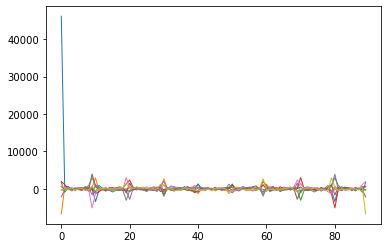

0    rub
Name: 0, dtype: object


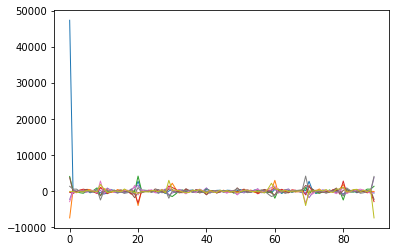

0    rub
Name: 1, dtype: object


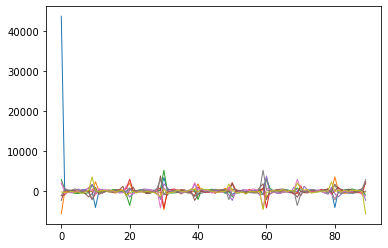

0    rub
Name: 2, dtype: object


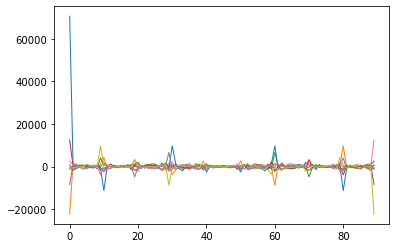

0    stroke
Name: 3, dtype: object


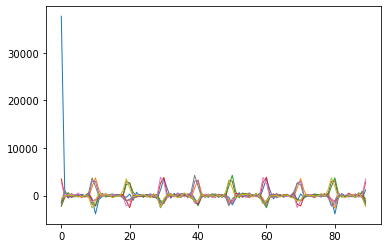

0    poke
Name: 4, dtype: object


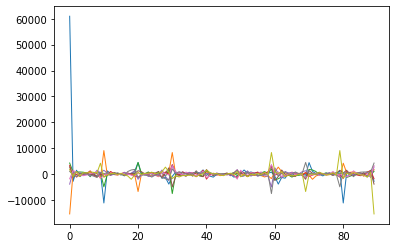

0    stroke
Name: 5, dtype: object


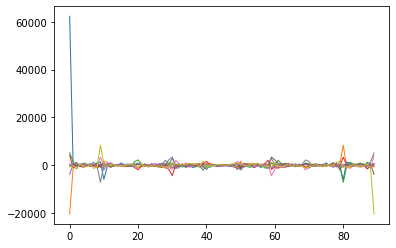

0    stroke
Name: 6, dtype: object


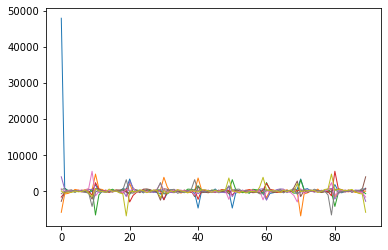

0    rub
Name: 7, dtype: object


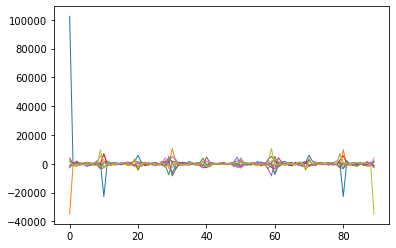

0    stroke
Name: 8, dtype: object


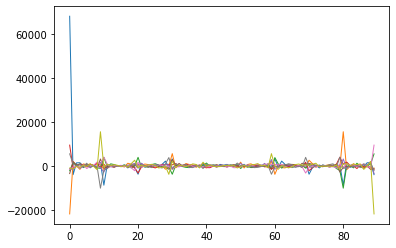

0    stroke
Name: 9, dtype: object


In [26]:
for i in range(10):
    index = i

    ffft = fft(np.array(df_in.iloc[index,:]))
    act_test = ffft
    act_label = df_out.iloc[index,:]
    testline = list(act_test)

    Fs0 = testline[0::9]
    Fs1 = testline[1::9]
    Fs2 = testline[2::9]
    Fs3 = testline[3::9]
    Fs4 = testline[4::9]
    Fs5 = testline[5::9]
    Fs6 = testline[6::9]
    Fs7 = testline[7::9]
    Fs8 = testline[8::9]

    ls = list(range(90))
    #two = np.ones(len(ls))*200

    plt.plot(ls,Fs0,linewidth=1.0)
    plt.plot(ls,Fs1,linewidth=1.0)
    plt.plot(ls,Fs2,linewidth=1.0)
    plt.plot(ls,Fs3,linewidth=1.0)
    plt.plot(ls,Fs4,linewidth=1.0)
    plt.plot(ls,Fs5,linewidth=1.0)
    plt.plot(ls,Fs6,linewidth=1.0)
    plt.plot(ls,Fs7,linewidth=1.0)
    plt.plot(ls,Fs8,linewidth=1.0)
    #plt.plot(ls,two,linewidth=1.0)
    plt.show()
    
    print(act_label)

In [27]:
df_stats.to_csv(r'eskin_stats.csv', index = False, header=False)
df_fft.to_csv(r'eskin_stats_fft.csv', index = False, header=False)